# Conceptualization and Verification of Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
tau_fps

## Representation of Far field stress in terms of Stress Intensity factors
In this implementation, the far field stress is represented in  terms of Stress Intensity factors (SIFs) where $K_I$ represents mode I and $K_{II}$ depicts mode II. This terminology of measuring stresses in SIFs for external stress acting in uniaxial direction is shown as:
\begin{gather*}
K_I = \sigma_x \sqrt{\pi a}\sin^2 \beta  \\
K_{II} = \sigma_x \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}
The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. $\beta$ represents the angle of crack orientation with respect to the vertical direction and $a$ represents the length of crack as depicted in figure. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

In [4]:
K_I = sigma_x * sp.sqrt(sp.pi * a) * s_b**2
K_II  = sigma_x * sp.sqrt(sp.pi * a) * c_b * s_b
K_I, K_II

In [5]:
params = {beta:45*np.pi/180}

In [6]:
K_I_ = K_I#.subs(params)
K_II_ = K_II#.subs(params)
K_I_, K_II_

In [7]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [8]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

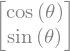

In [9]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress Equation
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}} + T \delta_{1i} \delta_{1j}
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures. $T$ represents the crack parallel stress and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

## T - Stress (Crack Parallel Stress)
The crack parallel stress for a uniaxial case is given by:
\begin{gather*}
T = \sigma_x \cos 2 \beta
\end{gather*}

In [10]:
T = sigma_x * ((c_b)**2 - (s_b)**2)
T

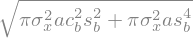

In [11]:
Balpha = sp.Symbol(r'B \alpha', nonnegative = True)
K_eff = sp.sqrt(K_I**2 + K_II**2)
K_eff

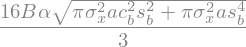

In [12]:
gamma = (16 * Balpha * K_eff) / 3
gamma

## Angular Function

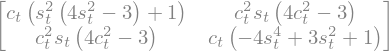

In [13]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

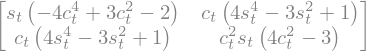

In [14]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

## Stress Equation at the Crack tip in Cartesian Coordinates

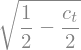

In [15]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

In [16]:
r_val = 0.2

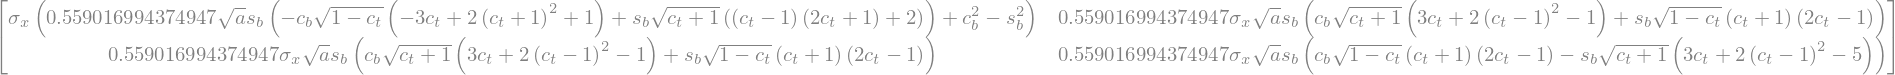

In [17]:
sigma = sp.Matrix([[(K_I_ * S_I_[0,0] + K_II_ * S_II_[0,0])/ (sp.sqrt(2 * sp.pi * r)) + T , (K_I_ * S_I_[0,1] + K_II_ * S_II_[0,1])/ (sp.sqrt(2 * sp.pi * r))],
                   [(K_I_ * S_I_[0,1] + K_II_ * S_II_[0,1]) / (sp.sqrt(2 * sp.pi * r)), (K_I_ * S_I_[1,1] + K_II_ * S_II_[1,1])/ (sp.sqrt(2 * sp.pi * r))]])
sigma_ = sp.simplify(sigma) 
sigmaa = sigma.subs(c_t, c_t_h).subs(s_t, s_t_h).subs(r, r_val)
s = sp.simplify(sigmaa)
s

## Stress Transformation from Cartesian to Polar Coordinates
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
R_t = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma_t = R_t^T \sigma_{ij} R_t 
\end{align}

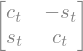

In [18]:
R_t = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
R_t

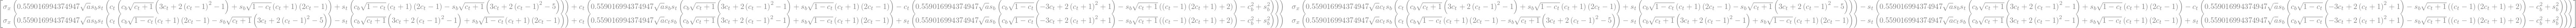

In [19]:
sig_p = R_t.T * s * R_t
sig_sim = sp.simplify(sig_p)
sig_sim

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

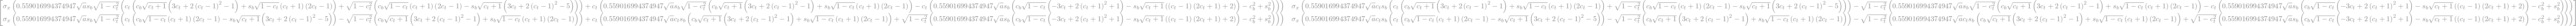

In [20]:
s_t_ = sp.sqrt(1 - c_t**2)
sig = sig_sim.subs(s_t, s_t_)
sig

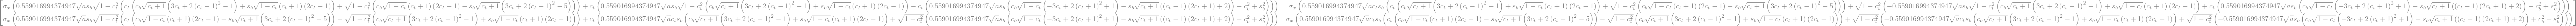

In [21]:
sig_ = sp.simplify(sig)
sig_

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta \theta}$ is maximum depicting principal stress than $\sigma_{r \theta}$ becomes:  
\begin{gather*}
\sigma_{r \theta} = 0
\end{gather*}

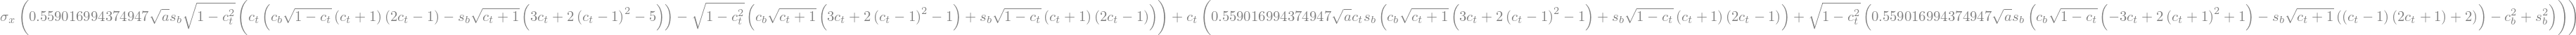

In [22]:
sig_[1,0]

In [57]:
theta_sol = sp.solve(sig[1,0], c_t)
theta_sol

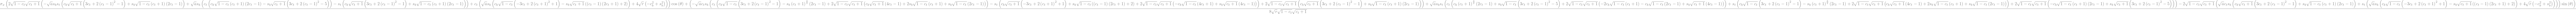

In [78]:
d_sig_d_cs = sig_sim[1,0].diff(cs_theta)
d_cs_d_theta = cs_theta_.diff(theta)
d_sig_d_theta = (d_sig_d_cs.T * d_cs_d_theta)[0,0]
sp.simplify(d_sig_d_theta)

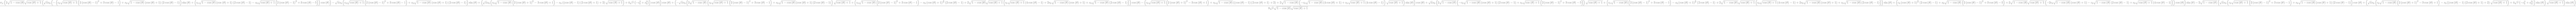

In [79]:
s = sp.simplify(d_sig_d_theta)
s_ = s.subs(cs_theta[0], cs_theta_[0]).subs(cs_theta[1], cs_theta_[1])
#s_n = s_.subs(s_t, s_t_)
s_

In [23]:
pp = {sigma_x : 1, a :1, r:1, s_b : 0.707 , c_b: 0.707}
theta_sol = sp.solve(sig_sim[1,0], c_t)
#theta_val = theta_sol[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
#theta_ = sp.acos(theta_val)
#theta_
theta_sol

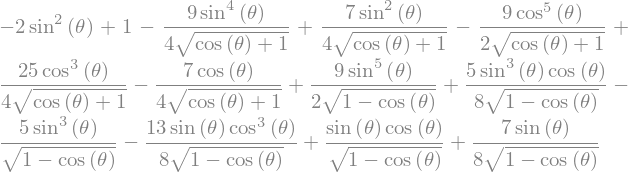

In [86]:
sp.simplify(s_.subs(pp))

In [65]:
p_ = {r: 1, T : 1}
the = sp.simplify(sig_[1,0].subs(c_t, sp.cos(theta)).subs(p_))
theta_val = sp.solve(the, theta, simplify = False, rational = False)
theta_val
#sig_[1,0].subs(c_t, sp.cos(theta)).subs(T, T_val)

KeyboardInterrupt: 

In [39]:
r_val = 1
theta_sol = sp.solve(sig_[1,0].subs(r, r_val), c_t)
theta_sol

NotImplementedError: multiple generators [c_t, sqrt(1 - c_t), sqrt(1 - c_t**2), sqrt(c_t + 1)]
No algorithms are implemented to solve equation \sigma_x*sqrt(a)*s_b*sqrt(1 - c_t**2)*(c_t*(c_b*sqrt(1 - c_t)*(c_t + 1)*(2*c_t - 1) - s_b*sqrt(c_t + 1)*(3*c_t + 2*(c_t - 1)**2 - 5)) - sqrt(1 - c_t**2)*(c_b*sqrt(c_t + 1)*(3*c_t + 2*(c_t - 1)**2 - 1) + s_b*sqrt(1 - c_t)*(c_t + 1)*(2*c_t - 1)))/4 + c_t*(\sigma_x*sqrt(a)*c_t*s_b*(c_b*sqrt(c_t + 1)*(3*c_t + 2*(c_t - 1)**2 - 1) + s_b*sqrt(1 - c_t)*(c_t + 1)*(2*c_t - 1)) + sqrt(1 - c_t**2)*(-4*T + \sigma_x*sqrt(a)*s_b*(c_b*sqrt(1 - c_t)*(-3*c_t + 2*(c_t + 1)**2 + 1) - s_b*sqrt(c_t + 1)*((c_t - 1)*(2*c_t + 1) + 2))))/4

In [112]:
get_theta = sp.lambdify((beta), theta_, 'numpy')
get_theta

NameError: name 'theta_' is not defined

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta = np.linspace(0, 90 * np.pi/180, 100)
theta = get_theta(beta) 
ax1.plot(beta * 180/np.pi, theta * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()

In [ ]:
theta * 180/ np.pi 

In [ ]:
beta * 180/np.pi